In [38]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
from ipywidgets import interactive

## Polynomial Regression

In [39]:
N = 30
y_noise = 0.2
x_noise = 1/(3*N)

np.random.seed(0)
x = np.linspace(0,1,N)+np.random.normal(0,x_noise,N)
x[x>1] = 1
x[x<0] = 0
y_den = np.sin(2*3.1415*x)
y = y_den + np.random.normal(0, y_noise,len(x))

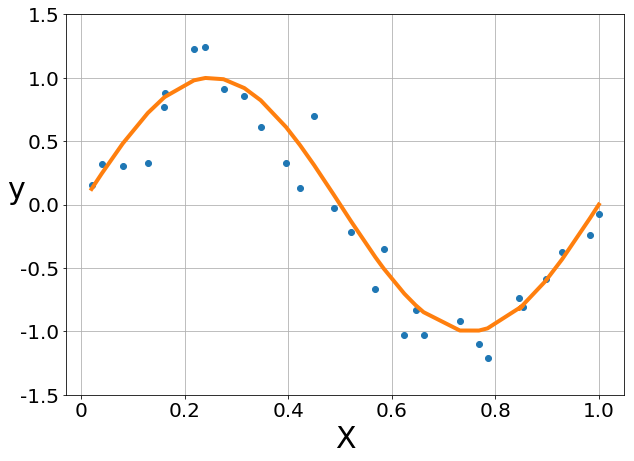

In [40]:
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(1,1,1)
ax.plot(x,y,'o')
ax.plot(x,y_den,'-', linewidth=4)
ax.grid(True)
ax.set_xlabel("X", fontsize=30)
ax.set_ylabel("y", fontsize=30, rotation=0)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticklabels( [0,0.2,0.4,0.6,0.8,1.0],fontsize=20 )
ax.set_yticks(np.linspace(-1.5,1.5,7))
ax.set_yticklabels(np.linspace(-1.5,1.5,7),fontsize=20 )
plt.show()

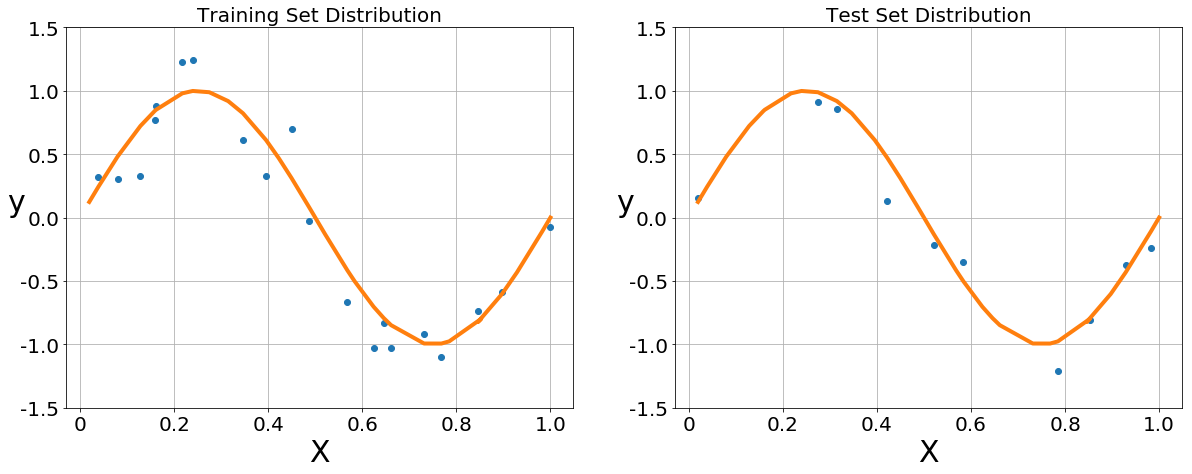

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
fig = plt.figure(figsize=(20,7))
gs = gridspec.GridSpec(1, 2)

ax = plt.subplot(gs[0])
ax.plot(X_train,y_train,'o')
ax.plot(x,y_den,'-', linewidth=4)
ax.grid(True)
ax.set_xlabel("X", fontsize=30)
ax.set_ylabel("y", fontsize=30, rotation=0)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticklabels( [0,0.2,0.4,0.6,0.8,1.0],fontsize=20 )
ax.set_yticks(np.linspace(-1.5,1.5,7))
ax.set_yticklabels(np.linspace(-1.5,1.5,7),fontsize=20 )
ax.set_title("Training Set Distribution", fontsize=20)

ax = plt.subplot(gs[1])
ax.plot(X_test,y_test,'o')
ax.plot(x,y_den,'-', linewidth=4)
ax.grid(True)
ax.set_xlabel("X", fontsize=30)
ax.set_ylabel("y", fontsize=30, rotation=0)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticklabels( [0,0.2,0.4,0.6,0.8,1.0],fontsize=20 )
ax.set_yticks(np.linspace(-1.5,1.5,7))
ax.set_yticklabels(np.linspace(-1.5,1.5,7),fontsize=20 )
ax.set_title("Test Set Distribution", fontsize=20)

plt.show()

In [49]:
def make_regression(degree, regularizer=False, alpha=0.1, plot=False):
    feat_eng = PolynomialFeatures(degree, include_bias=False)
    X = feat_eng.fit_transform(x.reshape(-1,1))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
   
    if not regularizer:
        reg = linear_model.LinearRegression()
    elif regularizer=="ridge":
        reg = linear_model.Ridge(alpha=alpha)
    elif regularizer=="lasso":
        reg = linear_model.Lasso(alpha=alpha)
    else:
        raise TypeError("Wrong regularization chosen")
    
    reg.fit(X_train,y_train)
        
    def solution(model):
        x = np.linspace(0,1,100)
        yhat = model.intercept_ 
        for i,c in enumerate(model.coef_):
            yhat += np.power(x,i+1)*c
        return x,yhat

    def MSE(y,yhat):
        return np.mean((y-yhat)**2)

    xhat, yhat = solution(reg)
    
    if plot:
        fig = plt.figure(figsize=(20,7))

        gs = gridspec.GridSpec(1, 2)
        ax = plt.subplot(gs[0])
        ax.plot(X_train[:,0],y_train,'o')
        ax.plot(x,y_den,'-', linewidth=3)
        ax.plot(xhat,yhat,'-', linewidth=4)
        ax.grid(True)
        ax.set_xlabel("X", fontsize=30)
        ax.set_ylabel("y", fontsize=30, rotation=0)
        ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
        ax.set_xticklabels( [0,0.2,0.4,0.6,0.8,1.0],fontsize=20 )
        ax.set_yticks(np.linspace(-1.5,1.5,7))
        ax.set_yticklabels(np.linspace(-1.5,1.5,7),fontsize=20 )
        ax.set_title("Training MSE = {0:.4f}".format(MSE(y_train,reg.predict(X_train))), fontsize=20)
        ax.set_ylim(-2.5,2.5)

        ax = plt.subplot(gs[1])
        ax.plot(X_test[:,0],y_test,'o')
        ax.plot(x,y_den,'-', linewidth=3)
        ax.plot(xhat,yhat,'-', linewidth=4)
        ax.grid(True)
        ax.set_xlabel("X", fontsize=30)
        ax.set_ylabel("y", fontsize=30, rotation=0)
        ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
        ax.set_xticklabels( [0,0.2,0.4,0.6,0.8,1.0],fontsize=20 )
        ax.set_yticks(np.linspace(-1.5,1.5,7))
        ax.set_yticklabels(np.linspace(-1.5,1.5,7),fontsize=20 )
        ax.set_title("Test MSE = {0:.4f}".format(MSE(y_test,reg.predict(X_test))), fontsize=20)
        ax.set_ylim(-2.5,2.5)
        plt.show()
    
    return MSE(y_train,reg.predict(X_train)),MSE(y_test,reg.predict(X_test))
    

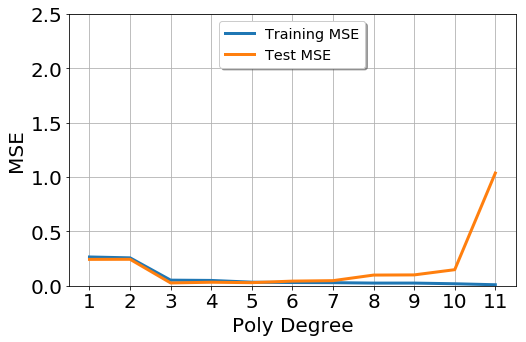

In [50]:
MSE_TRAIN = []
MSE_TEST = []
DEGREES = range(1,12)
for d in DEGREES:
    mse_train, mse_test = make_regression(d, regularizer=False, alpha=0, plot=False)
    MSE_TRAIN.append(mse_train)
    MSE_TEST.append(mse_test)
fig = plt.figure(figsize=(8,5))
ax=plt.subplot(1,1,1)
ax.plot(DEGREES, MSE_TRAIN,'-', linewidth=3, label="Training MSE")
ax.plot(DEGREES, MSE_TEST,'-', linewidth=3, label="Test MSE")
ax.set_xlabel("Poly Degree", fontsize=20)
ax.set_ylabel("MSE", fontsize=20, rotation=90)
ax.set_xticks(DEGREES)
ax.set_xticklabels( DEGREES,fontsize=20 )

ax.set_yticks(np.linspace(0,3,7))
ax.set_yticklabels(np.linspace(0,3,7),fontsize=20 )
ax.grid(True)
ax.set_ylim(0,2.5)
ax.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.show()

In [51]:
interactive_plot = interactive(make_regression,degree=(1, 15), regularizer=False, alpha=0, plot=True)
#output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=8, description='degree', max=15, min=1), Checkbox(value=False, descripti…

## Regularized Polynomial Regression

In [57]:
interactive_plot = interactive(make_regression,degree=(1, 15), regularizer="ridge", alpha=(0,0.1,0.005), plot=True)
#output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=8, description='degree', max=15, min=1), Text(value='ridge', description…

In [58]:
interactive_plot = interactive(make_regression,degree=(1, 15), regularizer="lasso", alpha=(0,0.1,0.005), plot=True)
#output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=8, description='degree', max=15, min=1), Text(value='lasso', description…